<a href="https://colab.research.google.com/github/Asaduzzaman-Seam/Video-Classification-using-Convolutional-Neural-Networks-CNNs-/blob/main/Video_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **<center><font style="color:rgb(100,109,254)">Video Classification using Convolutional Neural Network (CNN)</font> </center>**

## **<font style="color:rgb(134,19,348)"> Outline </font>**

- **`Step 1:` Visualize the Data with its Labels**

- **`Step 2:` Preprocess the Dataset**

- **`Step 3:` Split the Data into Train and Test Set**

- **`Step 4:` Implement the ConvLSTM Approach**

    - **`Step 4.1:` Construct the Model**
    
    - **`Step 4.2:` Compile & Train the Model**
    
    - **`Step 4.3:` Plot Model’s Loss & Accuracy Curves**

- **`Step 5:` implement the LRCN Approach**
 
    - **`Step 5.1:` Construct the Model**
    
    - **`Step 5.2:` Compile & Train the Model**
    
    - **`Step 5.3:` Plot Model’s Loss & Accuracy Curves**
    
- **`Step 6:` Test the Best Performing Model on Random videos**


# Pre-Step: Import and Initialize the Data & Library

In [ ]:
#Import the Dataset from dropbox
!wget https://www.dropbox.com/s/n94y7sex7bxm6nx/dataset.zip?dl=0
#Unzip the Dataset
!unzip /content/dataset.zip\?dl\=0
#Create "dataset" folder
!mkdir dataset
#Copy Files into required directory
!cp "/content/Biking" "/content/dataset" -rf
!cp "/content/Diving" "/content/dataset" -rf
!cp "/content/Kayaking" "/content/dataset" -rf

--2022-11-05 15:45:33--  https://www.dropbox.com/s/n94y7sex7bxm6nx/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/n94y7sex7bxm6nx/dataset.zip [following]
--2022-11-05 15:45:33--  https://www.dropbox.com/s/raw/n94y7sex7bxm6nx/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7aaf0dfa6b19ba587f2615ac13.dl.dropboxusercontent.com/cd/0/inline/BwKEEeI-tp4LwaP94kOXlzcT1UCy9WbgYHNBCkimGXBsIqYRSnZW-n-irQfTSKCVftAqL62uuitL5VprDqU0R-OAeHGZcoxf1-UhxCzb_5AhffssoXyZ5yl6jEE48pX9eBSBJXZA1tXDhUO4Mlq4bcQUbqvn4IcFx7iI9Uqbp8mVLA/file# [following]
--2022-11-05 15:45:34--  https://uc7aaf0dfa6b19ba587f2615ac13.dl.dropboxusercontent.com/cd/0/inline/BwKEEeI-tp4LwaP94kOXlzcT1UCy9WbgYHNBCkimGXBsIqYRSnZW-n-irQfTSKCVftAqL62uuitL5V

In [ ]:
# Install the required libraries
!pip install tensorflow opencv-contrib-python youtube-dl moviepy pydot
!pip install git+https://github.com/TahaAnwar/pafy.git#egg=pafy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/TahaAnwar/pafy.git to /tmp/pip-install-wobks74p/pafy_2a275b6a43294634bb79625ee4c22052
  Running command git clone -q https://github.com/TahaAnwar/pafy.git /tmp/pip-install-wobks74p/pafy_2a275b6a43294634bb79625ee4c22052


In [ ]:
# Import the required libraries.
import os
import cv2
import math
import pafy
import random
import numpy as np
import datetime as dt
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import deque

%matplotlib inline

from IPython.display import HTML
from base64 import b64encode

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns

In [ ]:
# Set Numpy, Python, and Tensorflow seeds
seed_constant_value = 27
np.random.seed(seed_constant_value)
random.seed(seed_constant_value)
tf.random.set_seed(seed_constant_value)

# Step 1: Visualize the Data with its Labels

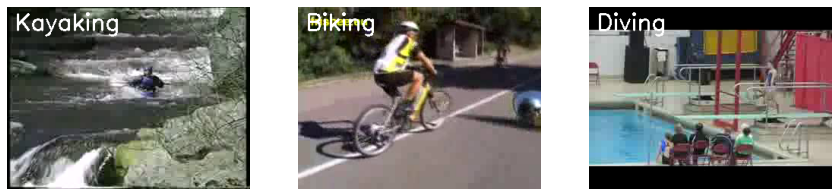

In [ ]:
# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize = (20, 20))

# Get the names of all classes/categories in UCF50.
AllClassesNames = os.listdir('/content/dataset')

# Generate a list of 20 random values. The values will be between 0-50, 
# where 50 is the total number of class in the dataset. 
RandomRange = random.sample(range(len(AllClassesNames)), 3)

# Iterating through all the generated random values.
for Coun_ter, RandomIndex in enumerate(RandomRange, 1):

    # Retrieve a Class Name using the Random Index.
    SelectedClassName = AllClassesNames[RandomIndex]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    VideoFilesNamesList = os.listdir(f'/content/dataset/{SelectedClassName}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    SelectedVideoFileName = random.choice(VideoFilesNamesList)

    # Initialize a VideoCapture object to read from the video File.
    VideoReader = cv2.VideoCapture(f'/content/dataset/{SelectedClassName}/{SelectedVideoFileName}')
    
    # Read the first frame of the video file.
    _, BGR_Frame = VideoReader.read()

    # Release the VideoCapture object. 
    VideoReader.release()

    # Convert the frame from BGR into RGB format. 
    RGB_Frame = cv2.cvtColor(BGR_Frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(RGB_Frame, SelectedClassName, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Display the frame.
    plt.subplot(5, 4, Coun_ter);
    plt.imshow(RGB_Frame);
    plt.axis('off')

# Step 2: Preprocess the Dataset

In [ ]:
# Specify the height and width to which each video frame will be resized in our dataset.
ImageHeight , ImageWidth = 64, 64

# Specify the number of frames of a video that will be fed to the model as one sequence.
SequenceLength = 20

# Specify the directory containing the UCF50 dataset. 
DatasetDIR = "/content/dataset"

# Specify the list containing the names of the classes used for training. Feel free to choose any set of classes.
ClassesLIST = ["Biking", "Kayaking", "Diving"]

In [ ]:
def FramesExtractionFunction(VideoPATH):

    # Declare a list to store video frames.
    FramesList = []
    
    # Read the Video File using the VideoCapture object.
    VideoReader = cv2.VideoCapture(VideoPATH)

    # Get the total number of frames in the video.
    VideoFramesCount = int(VideoReader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the the interval after which frames will be added to the list.
    SkipFramesWindow = max(int(VideoFramesCount/SequenceLength), 1)

    # Iterate through the Video Frames.
    for FrameCounter in range(SequenceLength):

        # Set the current frame position of the video.
        VideoReader.set(cv2.CAP_PROP_POS_FRAMES, FrameCounter * SkipFramesWindow)

        # Reading the frame from the video. 
        Succes_S, Fram_E = VideoReader.read() 

        # Check if Video frame is not successfully read then break the loop
        if not Succes_S:
            break

        # Resize the Frame to fixed height and width.
        ResizedFrame = cv2.resize(Fram_E, (ImageHeight, ImageWidth))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        NormalizedFrame = ResizedFrame / 255
        
        # Append the normalized frame into the frames list
        FramesList.append(NormalizedFrame)
    
    # Release the VideoCapture object. 
    VideoReader.release()

    # Return the frames list.
    return FramesList

In [ ]:
def CreateDatasetFunction():

    # Declared Empty Lists to store the features, labels and video file path values.
    Feature_s = []
    Label_s = []
    VideoFilesPath_s = []
    
    # Iterating through all the classes mentioned in the classes list
    for ClassIndex, ClassName in enumerate(ClassesLIST):
        
        # Display the name of the class whose data is being extracted.
        print(f'Extracting_Data_of_Class :: {ClassName}')
        
        # Get the list of video files present in the specific class name directory.
        FilesList = os.listdir(os.path.join(DatasetDIR, ClassName))
        
        # Iterate through all the files present in the files list.
        for FileName in FilesList:
            
            # Get the complete video path.
            VideoFilePath = os.path.join(DatasetDIR, ClassName, FileName)

            # Extract the frames of the video file.
            Frame_s = FramesExtractionFunction(VideoFilePath)

            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(Frame_s) == SequenceLength:

                # Append the data to their repective lists.
                Feature_s.append(Frame_s)
                Label_s.append(ClassIndex)
                VideoFilesPath_s.append(VideoFilePath)

    # Converting the list to numpy arrays
    Feature_s = np.asarray(Feature_s)
    Label_s = np.array(Label_s)  
    
    # Return the frames, class index, and video file path.
    return Feature_s, Label_s, VideoFilesPath_s

In [ ]:
# Create the dataset.
Feature_s, Label_s, VideoFilesPath_s = CreateDatasetFunction()

Extracting_Data_of_Class :: Biking
Extracting_Data_of_Class :: Kayaking
Extracting_Data_of_Class :: Diving


In [ ]:
# Using Keras's to_categorical method to convert labels into one-hot-encoded vectors
OneHotEncodedLabel_s = to_categorical(Label_s)

# Step 3: Split the Data into Train and Test Set

In [ ]:
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
FeaturesTrain, FeaturesTest, LabelsTrain, LabelsTest = train_test_split(Feature_s, OneHotEncodedLabel_s,
                                                                            test_size = 0.25, shuffle = True,
                                                                            random_state = seed_constant_value)

# Step 4: Implement the ConvLSTM Approach

**Step 4.1: Construct the Model**

In [ ]:
def CreateConvLSTMModelFunction():

    # We will use a Sequential model for model construction
    convLSTM_model = Sequential()

    # Define the Model Architecture.
    ########################################################################################################################
    
    convLSTM_model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (SequenceLength,
                                                                                      ImageHeight, ImageWidth, 3)))
    
    convLSTM_model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    convLSTM_model.add(TimeDistributed(Dropout(0.2)))
    
    convLSTM_model.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    convLSTM_model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    convLSTM_model.add(TimeDistributed(Dropout(0.2)))
    
    convLSTM_model.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    convLSTM_model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    convLSTM_model.add(TimeDistributed(Dropout(0.2)))
    
    convLSTM_model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    convLSTM_model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    #model.add(TimeDistributed(Dropout(0.2)))
    
    convLSTM_model.add(Flatten()) 
    
    convLSTM_model.add(Dense(len(ClassesLIST), activation = "softmax"))
    
    ########################################################################################################################
     
    # Display the models summary.
    convLSTM_model.summary()
    
    # Return the constructed convlstm model.
    return convLSTM_model

In [ ]:
# Construct the required convlstm model.
MyConvLSTM_model = CreateConvLSTMModelFunction()

# Display the success message. 
print("Convolutional Long Short-Term Memory (ConvLSTM) Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 62, 62, 4)     1024      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 20, 31, 31, 4)    0         
 )                                                               
                                                                 
 time_distributed (TimeDistr  (None, 20, 31, 31, 4)    0         
 ibuted)                                                         
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 20, 29, 29, 8)     3488      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 20, 15, 15, 8)    0         
 3D)                                                             
                                                        

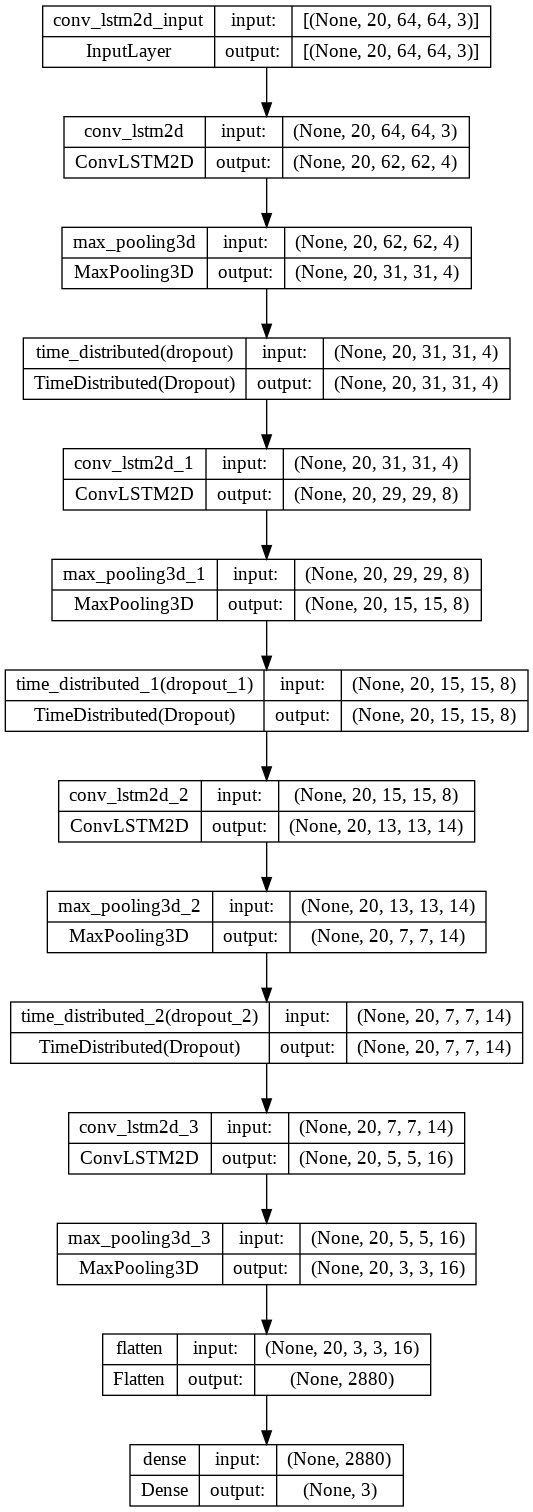

In [ ]:
# Plot the structure of the contructed model.
plot_model(MyConvLSTM_model, to_file = 'ConvLSTM_Model_Structure_Plot.png', show_shapes = True, show_layer_names = True)

**Step 4.2: Compile & Train the Model**

In [ ]:
# Create an Instance of Early Stopping Callback
EarlyStoppingCallback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
MyConvLSTM_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
MyConvLSTM_ModelTrainingHistory = MyConvLSTM_model.fit(x = FeaturesTrain, y = LabelsTrain, epochs = 50, batch_size = 4,
                                                     shuffle = True, validation_split = 0.2, 
                                                     callbacks = [EarlyStoppingCallback])

Epoch 1/50
68/68 [==============================] - 26s 260ms/step - loss: 0.9461 - accuracy: 0.5184 - val_loss: 0.7999 - val_accuracy: 0.6232
Epoch 2/50
68/68 [==============================] - 17s 243ms/step - loss: 0.6627 - accuracy: 0.6691 - val_loss: 0.8119 - val_accuracy: 0.7101
Epoch 3/50
68/68 [==============================] - 18s 269ms/step - loss: 0.5726 - accuracy: 0.7721 - val_loss: 0.7773 - val_accuracy: 0.7971
Epoch 4/50
68/68 [==============================] - 19s 274ms/step - loss: 0.5126 - accuracy: 0.7684 - val_loss: 0.8557 - val_accuracy: 0.6957
Epoch 5/50
68/68 [==============================] - 17s 246ms/step - loss: 0.4791 - accuracy: 0.8051 - val_loss: 0.6634 - val_accuracy: 0.7536
Epoch 6/50
68/68 [==============================] - 17s 247ms/step - loss: 0.4261 - accuracy: 0.8015 - val_loss: 0.6827 - val_accuracy: 0.7101
Epoch 7/50
68/68 [==============================] - 17s 244ms/step - loss: 0.3824 - accuracy: 0.8419 - val_loss: 0.6258 - val_accuracy: 0.7971

In [ ]:
# Evaluate the trained model.
ConvLSTM_ModelEvaluationHistory = MyConvLSTM_model.evaluate(FeaturesTest, LabelsTest)

4/4 [==============================] - 1s 111ms/step - loss: 0.3114 - accuracy: 0.8596


In [ ]:
# Get the loss and accuracy from model_evaluation_history.
ConvLSTM_ModelEvaluationLoss, ConvLSTM_ModelEvaluationAccuracy = ConvLSTM_ModelEvaluationHistory

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
DateTimeFormat = '%Y_%m_%d__%H_%M_%S'
CurrentDateTime_dt = dt.datetime.now()
CurrentDateTimeString = dt.datetime.strftime(CurrentDateTime_dt, DateTimeFormat)
ConvLSTM_ModelEvaluationLoss = round(ConvLSTM_ModelEvaluationLoss, 2)
ConvLSTM_ModelEvaluationAccuracy = round(ConvLSTM_ModelEvaluationAccuracy, 2)

# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
ModelFileName = f'ConvLSTM_Model_DateTime_{CurrentDateTimeString}_Loss_{ConvLSTM_ModelEvaluationLoss}_Acc_{ConvLSTM_ModelEvaluationAccuracy}.h5'

# Save your Model.
MyConvLSTM_model.save(ModelFileName)

**Step 4.3: Plot Model’s Loss & Accuracy Curves**

In [ ]:
def PlotMetricFunction(ModelTrainingHistory, MetricName_a, MetricName_b, PlotName):
    
    # Get metric values using metric names as identifiers.
    MetricValue_x = ModelTrainingHistory.history[MetricName_a]
    MetricValue_y = ModelTrainingHistory.history[MetricName_b]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(MetricValue_x))

    # Plot the Graph.
    plt.plot(epochs, MetricValue_x, 'blue', label = MetricName_a)
    plt.plot(epochs, MetricValue_y, 'red', label = MetricName_b)

    # Add title to the plot.
    plt.title(str(PlotName))

    # Add legend to the plot.
    plt.legend()

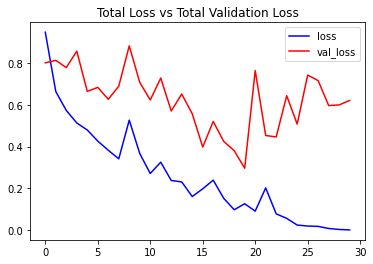

In [ ]:
# Visualize the training and validation loss metrices.
PlotMetricFunction(MyConvLSTM_ModelTrainingHistory, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

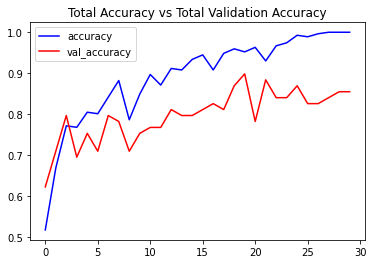

In [ ]:
# Visualize the training and validation accuracy metrices.
PlotMetricFunction(MyConvLSTM_ModelTrainingHistory, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

# Step 5: Implement the LRCN Approach

**Step 5.1: Construct the Model**

In [ ]:
def CreateLRCN_ModelFunction():

    # We will use a Sequential model for model construction.
    LRCN_Model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    
    LRCN_Model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SequenceLength, ImageHeight, ImageWidth, 3)))
    
    LRCN_Model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    LRCN_Model.add(TimeDistributed(Dropout(0.25)))
    
    LRCN_Model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    LRCN_Model.add(TimeDistributed(MaxPooling2D((4, 4))))
    LRCN_Model.add(TimeDistributed(Dropout(0.25)))
    
    LRCN_Model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    LRCN_Model.add(TimeDistributed(MaxPooling2D((2, 2))))
    LRCN_Model.add(TimeDistributed(Dropout(0.25)))
    
    LRCN_Model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    LRCN_Model.add(TimeDistributed(MaxPooling2D((2, 2))))
    #model.add(TimeDistributed(Dropout(0.25)))
                                      
    LRCN_Model.add(TimeDistributed(Flatten()))
                                      
    LRCN_Model.add(LSTM(32))
                                      
    LRCN_Model.add(Dense(len(ClassesLIST), activation = 'softmax'))

    ########################################################################################################################

    # Display the models summary.
    LRCN_Model.summary()
    
    # Return the constructed LRCN model.
    return LRCN_Model

In [ ]:
# Construct the required LRCN model.
MyLRCN_Model = CreateLRCN_ModelFunction()

# Display the success message.
print("Long-term Recurrent Convolutional Network (LRCN) Model Created Successfully!")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDis  (None, 20, 64, 64, 16)   448       
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 20, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 20, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_6 (TimeDis  (None, 20, 16, 16, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 20, 4, 4, 32)    

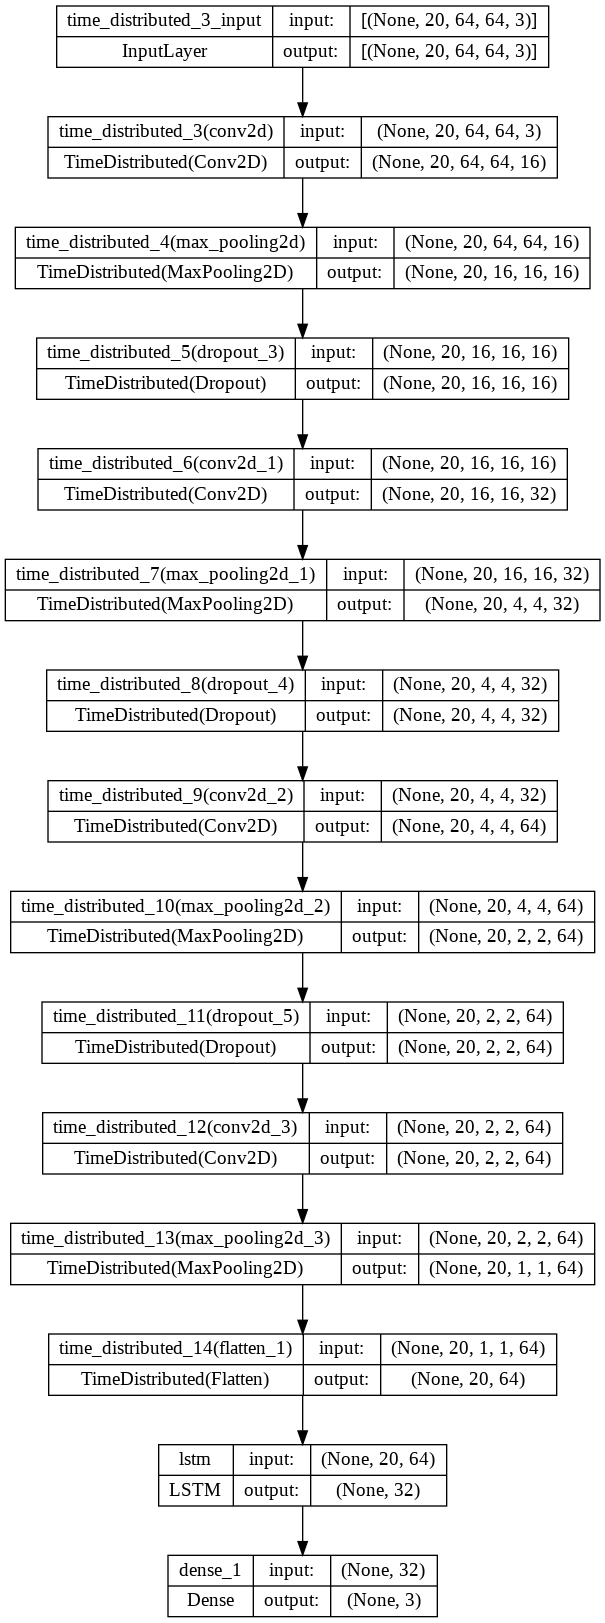

In [ ]:
# Plot the structure of the contructed LRCN model.
plot_model(MyLRCN_Model, to_file = 'LRCN_Model_Structure_Plot.png', show_shapes = True, show_layer_names = True)

**Step 5.2: Compile & Train the Model**

In [ ]:
# Create an Instance of Early Stopping Callback.
EarlyStoppingCallback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
MyLRCN_Model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_ModelTrainingHistory = MyLRCN_Model.fit(x = FeaturesTrain, y = LabelsTrain, epochs = 70, batch_size = 4 ,
                                             shuffle = True, validation_split = 0.2, callbacks = [EarlyStoppingCallback])

Epoch 1/70
68/68 [==============================] - 4s 20ms/step - loss: 1.1007 - accuracy: 0.3713 - val_loss: 1.0799 - val_accuracy: 0.3623
Epoch 2/70
68/68 [==============================] - 1s 11ms/step - loss: 0.9880 - accuracy: 0.5147 - val_loss: 0.9108 - val_accuracy: 0.5362
Epoch 3/70
68/68 [==============================] - 1s 9ms/step - loss: 0.8134 - accuracy: 0.6471 - val_loss: 0.8776 - val_accuracy: 0.5507
Epoch 4/70
68/68 [==============================] - 1s 9ms/step - loss: 0.5589 - accuracy: 0.7757 - val_loss: 0.7008 - val_accuracy: 0.7246
Epoch 5/70
68/68 [==============================] - 1s 9ms/step - loss: 0.5702 - accuracy: 0.7831 - val_loss: 0.6034 - val_accuracy: 0.7681
Epoch 6/70
68/68 [==============================] - 1s 9ms/step - loss: 0.4514 - accuracy: 0.8199 - val_loss: 0.5202 - val_accuracy: 0.8116
Epoch 7/70
68/68 [==============================] - 1s 9ms/step - loss: 0.3934 - accuracy: 0.8493 - val_loss: 0.6681 - val_accuracy: 0.6957
Epoch 8/70
68/68 [

In [ ]:
# Evaluate the trained model.
LRCN_ModelEvaluationHistory = MyLRCN_Model.evaluate(FeaturesTest, LabelsTest)

4/4 [==============================] - 1s 61ms/step - loss: 0.2263 - accuracy: 0.9211


In [ ]:
# Get the loss and accuracy from model_evaluation_history.
LRCN_ModelEvaluationLoss, LRCN_ModelEvaluationAccuracy = LRCN_ModelEvaluationHistory

# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
DateTimeFormat = '%Y_%m_%d__%H_%M_%S'
CurrentDateTime_dt = dt.datetime.now()
CurrentDateTimeString = dt.datetime.strftime(CurrentDateTime_dt, DateTimeFormat)
LRCN_ModelEvaluationLoss = round(LRCN_ModelEvaluationLoss, 2)
LRCN_ModelEvaluationAccuracy = round(LRCN_ModelEvaluationAccuracy, 2)
    
# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
ModelFileName = f'LRCN_model_Date_Time_{CurrentDateTimeString}_Loss_{LRCN_ModelEvaluationLoss}_Acc_{LRCN_ModelEvaluationAccuracy}.h5'

# Save the Model.
MyLRCN_Model.save(ModelFileName)

**Step 5.3: Plot Model’s Loss & Accuracy Curves**

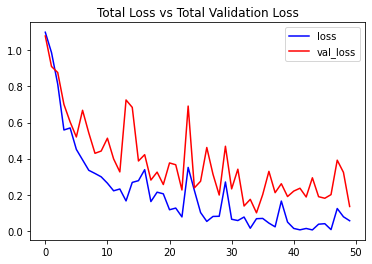

In [ ]:
# Visualize the training and validation loss metrices.
PlotMetricFunction(LRCN_ModelTrainingHistory, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

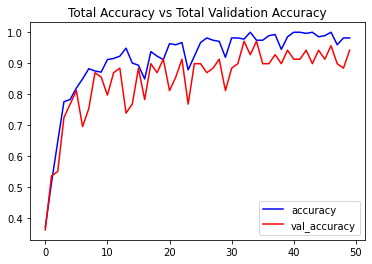

In [ ]:
# Visualize the training and validation accuracy metrices.
PlotMetricFunction(LRCN_ModelTrainingHistory, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

# Step  6:  Test  the  Best  Performing  Model  on  Random Videos

**Step 6.1: Download Random Test Videos**

In [ ]:
!wget https://www.dropbox.com/s/hp1q91ilc0ozjka/RandomTestDataset.zip
!wget https://www.dropbox.com/s/c1aemj4x4444zz6/test_1.mp4
!wget https://www.dropbox.com/s/zsi5sc06mmg0gef/test_2.mp4

!unzip /content/RandomTestDataset.zip

--2022-11-05 16:01:42--  https://www.dropbox.com/s/hp1q91ilc0ozjka/RandomTestDataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/hp1q91ilc0ozjka/RandomTestDataset.zip [following]
--2022-11-05 16:01:43--  https://www.dropbox.com/s/raw/hp1q91ilc0ozjka/RandomTestDataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca210507ead6591a35faa693871.dl.dropboxusercontent.com/cd/0/inline/BwLCLhG3whAlOlYCNQ-OJQwQPGu1XCdv1jFUDvzWRERhBXKYoI_nK6YUGXsVWjz70S-MIVT0-zJYxEcI10SfeV5RKh6j9_k3V_U0AXaSO3Dio-METG7UlZEGQcBEpAhndhm93xb4T4eCKCDfOaiiW6gKzzvcTWmKgilbkusNm0LdGA/file# [following]
--2022-11-05 16:01:43--  https://uca210507ead6591a35faa693871.dl.dropboxusercontent.com/cd/0/inline/BwLCLhG3whAlOlYCNQ-OJQwQPGu1XCdv1jFUDvzWRERhBXKYoI_nK

**Step 6.2: Predict on Videot**



1.   Predict on Video using ConvLSTM



In [ ]:
def PredictOnVideoFunction_ConvLSTM(RandomVideoFilePath, RandomVideoOutputFilePath, SequenceLength):

    # Initialize the VideoCapture object to read from the video file.
    VideoReader = cv2.VideoCapture(RandomVideoFilePath)

    # Get the width and height of the video.
    OriginalVideoWidth = int(VideoReader.get(cv2.CAP_PROP_FRAME_WIDTH))
    OriginalVideoHeight = int(VideoReader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Initialize the VideoWriter Object to store the output video in the disk.
    VideoWriter = cv2.VideoWriter(RandomVideoOutputFilePath, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 
                                   VideoReader.get(cv2.CAP_PROP_FPS), (OriginalVideoWidth, OriginalVideoHeight))

    # Declare a queue to store video frames.
    FramesQueue = deque(maxlen = SequenceLength)

    # Initialize a variable to store the predicted action being performed in the video.
    PredictedClassName = ''

    # Iterate until the video is accessed successfully.
    while VideoReader.isOpened():

        # Read the frame.
        Okay, Frame = VideoReader.read() 
        
        # Check if frame is not read properly then break the loop.
        if not Okay:
            break

        # Resize the Frame to fixed Dimensions.
        ResizedFrame = cv2.resize(Frame, (ImageHeight, ImageWidth))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        NormalizedFrame = ResizedFrame / 255

        # Appending the pre-processed frame into the frames list.
        FramesQueue.append(NormalizedFrame)

        # Check if the number of frames in the queue are equal to the fixed sequence length.
        if len(FramesQueue) == SequenceLength:

            # Pass the normalized frames to the model and get the predicted probabilities.
            PredictedLabelsProbabilitie_s = MyConvLSTM_model.predict(np.expand_dims(FramesQueue, axis = 0))[0]

            # Get the index of class with highest probability.
            PredictedLabel = np.argmax(PredictedLabelsProbabilitie_s)

            # Get the class name using the retrieved index.
            PredictedClassName = ClassesLIST[PredictedLabel]

        # Write predicted class name on top of the frame.
        cv2.putText(Frame, PredictedClassName, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Write The frame into the disk using the VideoWriter Object.
        VideoWriter.write(Frame)
        
    # Release the VideoCapture and VideoWriter objects.
    VideoReader.release()
    VideoWriter.release()

In [ ]:
#Select Video Number
VideoNo = '1'

# Construct the input video path.
InputVideoFilePath = f'/content/test_{VideoNo}.mp4'

# Construct the output video path.
OutputVideoFilePath = f'/content/Output-SeqLen{SequenceLength}-ConvLSTM.mp4'

# Perform Action Recognition on the Test Video.
PredictOnVideoFunction_ConvLSTM(InputVideoFilePath, OutputVideoFilePath, SequenceLength)

1/1 [==============================] - 0s 63ms/step


In [ ]:
# Display the output video.
!ffmpeg -i /content/Output-SeqLen20-ConvLSTM.mp4 output_ConvLSTM.mp4

mp4 = open('output_ConvLSTM.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)



2.   Predict on Video using LRCN



In [ ]:
def PredictOnVideoFunction_LRCN(RandomVideoFilePath, RandomVideoOutputFilePath, SequenceLength):

    # Initialize the VideoCapture object to read from the video file.
    VideoReader = cv2.VideoCapture(RandomVideoFilePath)

    # Get the width and height of the video.
    OriginalVideoWidth = int(VideoReader.get(cv2.CAP_PROP_FRAME_WIDTH))
    OriginalVideoHeight = int(VideoReader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Initialize the VideoWriter Object to store the output video in the disk.
    VideoWriter = cv2.VideoWriter(RandomVideoOutputFilePath, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 
                                   VideoReader.get(cv2.CAP_PROP_FPS), (OriginalVideoWidth, OriginalVideoHeight))

    # Declare a queue to store video frames.
    FramesQueue = deque(maxlen = SequenceLength)

    # Initialize a variable to store the predicted action being performed in the video.
    PredictedClassName = ''

    # Iterate until the video is accessed successfully.
    while VideoReader.isOpened():

        # Read the frame.
        Okay, Frame = VideoReader.read() 
        
        # Check if frame is not read properly then break the loop.
        if not Okay:
            break

        # Resize the Frame to fixed Dimensions.
        ResizedFrame = cv2.resize(Frame, (ImageHeight, ImageWidth))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        NormalizedFrame = ResizedFrame / 255

        # Appending the pre-processed frame into the frames list.
        FramesQueue.append(NormalizedFrame)

        # Check if the number of frames in the queue are equal to the fixed sequence length.
        if len(FramesQueue) == SequenceLength:

            # Pass the normalized frames to the model and get the predicted probabilities.
            PredictedLabelsProbabilitie_s = MyLRCN_Model.predict(np.expand_dims(FramesQueue, axis = 0))[0]

            # Get the index of class with highest probability.
            PredictedLabel = np.argmax(PredictedLabelsProbabilitie_s)

            # Get the class name using the retrieved index.
            PredictedClassName = ClassesLIST[PredictedLabel]

        # Write predicted class name on top of the frame.
        cv2.putText(Frame, PredictedClassName, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        # Write The frame into the disk using the VideoWriter Object.
        VideoWriter.write(Frame)
        
    # Release the VideoCapture and VideoWriter objects.
    VideoReader.release()
    VideoWriter.release()

In [ ]:
#Select Video Number
VideoNo = '2'

# Construct the input video path.
InputVideoFilePath = f'/content/test_{VideoNo}.mp4'

# Construct the output video path.
OutputVideoFilePath = f'/content/Output-SeqLen{SequenceLength}-LRCN.mp4'

# Perform Action Recognition on the Test Video.
PredictOnVideoFunction_LRCN(InputVideoFilePath, OutputVideoFilePath, SequenceLength)

1/1 [==============================] - 0s 17ms/step


In [ ]:
# Display the output video.
!ffmpeg -i /content/Output-SeqLen20-LRCN.mp4 output_LRCN.mp4

mp4 = open('output_LRCN.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

**Step 6.3: Predict Single Action**

In [ ]:
def PredictSingleActionFunction(VideoFilePath, SequenceLength, Model):

    # Initialize the VideoCapture object to read from the video file.
    VideoReader = cv2.VideoCapture(VideoFilePath)

    # Get the width and height of the video.
    OriginalVideoWidth = int(VideoReader.get(cv2.CAP_PROP_FRAME_WIDTH))
    OriginalVideoHeight = int(VideoReader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Declare a list to store video frames we will extract.
    FramesList = []
    
    # Initialize a variable to store the predicted action being performed in the video.
    PredictedClassName = ''

    # Get the number of frames in the video.
    VideoFramesCount = int(VideoReader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the interval after which frames will be added to the list.
    SkipFramesWindow = max(int(VideoFramesCount/SequenceLength),1)

    # Iterating the number of times equal to the fixed length of sequence.
    for FrameCounter in range(SequenceLength):

        # Set the current frame position of the video.
        VideoReader.set(cv2.CAP_PROP_POS_FRAMES, FrameCounter * SkipFramesWindow)

        # Read a frame.
        Success, Frame = VideoReader.read() 

        # Check if frame is not read properly then break the loop.
        if not Success:
            break

        # Resize the Frame to fixed Dimensions.
        ResizedFrame = cv2.resize(Frame, (ImageHeight, ImageWidth))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        NormalizedFrame = ResizedFrame / 255
        
        # Appending the pre-processed frame into the frames list
        FramesList.append(NormalizedFrame)

    # Passing the  pre-processed frames to the model and get the predicted probabilities.
    if(Model == 'LRCN'): PredictedLabelsProbabilities = MyLRCN_Model.predict(np.expand_dims(FramesList, axis = 0))[0]
    if(Model == 'ConvLSTM'): PredictedLabelsProbabilities = MyConvLSTM_model.predict(np.expand_dims(FramesList, axis = 0))[0]

    # Get the index of class with highest probability.
    PredictedLabel = np.argmax(PredictedLabelsProbabilities)

    # Get the class name using the retrieved index.
    PredictedClassName = ClassesLIST[PredictedLabel]
    
    # Display the predicted action along with the prediction confidence.
    print(f'Action Predicted: {PredictedClassName}\nConfidence: {PredictedLabelsProbabilities[PredictedLabel]}')
        
    # Release the VideoCapture object. 
    VideoReader.release()



1.   Predict Single Action using LRCN Model



In [ ]:

# Construct tihe nput youtube video path
Video_Title = 'test_2'
InputVideoFilePath = f'/content/{Video_Title}.mp4'
Model = 'LRCN'

# Display the output video.
!ffmpeg -i /content/{Video_Title}.mp4 output_LRCN.mp4

mp4 = open('output_LRCN.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()


ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
# Perform Single Prediction on the Test Video.
PredictSingleActionFunction(InputVideoFilePath, SequenceLength, Model)

HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

1/1 [==============================] - 0s 18ms/step
Action Predicted: Kayaking
Confidence: 0.9914425015449524


2.   Predict Single Action using ConvLSTM Model

In [ ]:
# Construct tihe nput youtube video path
Video_Title = 'test_2'
InputVideoFilePath = f'/content/{Video_Title}.mp4'
Model = 'ConvLSTM'



# Display the output video.
!ffmpeg -i /content/{Video_Title}.mp4 output_ConvLSTM.mp4

mp4 = open('output_ConvLSTM.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
# Perform Single Prediction on the Test Video.
PredictSingleActionFunction(InputVideoFilePath, SequenceLength, Model)

HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

1/1 [==============================] - 0s 59ms/step
Action Predicted: Kayaking
Confidence: 0.8377585411071777


# Step 6.4: Visualize Overall Model Performance using Test & Train Dataset

In [ ]:
def OverallPredictionFunction(VideoFilePath, SequenceLength, Model):

    # Initialize the VideoCapture object to read from the video file.
    VideoReader = cv2.VideoCapture(VideoFilePath)

    # Get the width and height of the video.
    OriginalVideoWidth = int(VideoReader.get(cv2.CAP_PROP_FRAME_WIDTH))
    OriginalVideoHeight = int(VideoReader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Declare a list to store video frames we will extract.
    FramesList = []
    
    # Initialize a variable to store the predicted action being performed in the video.
    PredictedClassName = ''

    # Get the number of frames in the video.
    VideoFramesCount = int(VideoReader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the interval after which frames will be added to the list.
    SkipFramesWindow = max(int(VideoFramesCount/SequenceLength),1)

    # Iterating the number of times equal to the fixed length of sequence.
    for FrameCounter in range(SequenceLength):

        # Set the current frame position of the video.
        VideoReader.set(cv2.CAP_PROP_POS_FRAMES, FrameCounter * SkipFramesWindow)

        # Read a frame.
        Success, Frame = VideoReader.read() 

        # Check if frame is not read properly then break the loop.
        if not Success:
            break

        # Resize the Frame to fixed Dimensions.
        ResizedFrame = cv2.resize(Frame, (ImageHeight, ImageWidth))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        NormalizedFrame = ResizedFrame / 255
        
        # Appending the pre-processed frame into the frames list
        FramesList.append(NormalizedFrame)

    # Passing the  pre-processed frames to the model and get the predicted probabilities.
    if(Model == 'LRCN'): PredictedLabelsProbabilities = MyLRCN_Model.predict(np.expand_dims(FramesList, axis = 0))[0]
    if(Model == 'ConvLSTM'): PredictedLabelsProbabilities = MyConvLSTM_model.predict(np.expand_dims(FramesList, axis = 0))[0]

    # Get the index of class with highest probability.
    PredictedLabel = np.argmax(PredictedLabelsProbabilities)

    # Get the class name using the retrieved index.
    PredictedClassName = ClassesLIST[PredictedLabel]
    
    # Display the predicted action along with the prediction confidence.
    print(f'Action Predicted: {PredictedClassName}\nConfidence: {PredictedLabelsProbabilities[PredictedLabel]}')
        
    # Release the VideoCapture object. 
    VideoReader.release()

    return PredictedClassName, PredictedLabel

In [ ]:
Count = 0
PredictCounter_LRCN = 0
PredictCounter_ConvLSTM = 0
Mat_ConvLSTM = []
Mat_LRCN = []
for Label in Label_s:
  print(f'...................  {Count}  ...................')
  ActualClassName = ClassesLIST[Label]
  print(f'ActualClassName: {ActualClassName}')
  print(f'Model: ConvLSTM')
  Predict_ConvLSTM, PredictedLabel_ConvLSTM = OverallPredictionFunction(VideoFilesPath_s[Count], 20, 'ConvLSTM')
  print(f'Model: LRCN')
  Predict_LRCN, PredictedLabel_LRCN = OverallPredictionFunction(VideoFilesPath_s[Count], 20, 'LRCN')
  Count = Count + 1
  if(ClassesLIST[Label] == Predict_ConvLSTM):
    PredictCounter_ConvLSTM = PredictCounter_ConvLSTM + 1
  if(ClassesLIST[Label] == Predict_LRCN):
    PredictCounter_LRCN = PredictCounter_LRCN + 1
  Mat_ConvLSTM.insert(Count,PredictedLabel_ConvLSTM)
  Mat_LRCN.insert(Count,PredictedLabel_LRCN)


...................  0  ...................
ActualClassName: Biking
Model: ConvLSTM
1/1 [==============================] - 0s 77ms/step
Action Predicted: Biking
Confidence: 0.8442702889442444
Model: LRCN
1/1 [==============================] - 0s 18ms/step
Action Predicted: Biking
Confidence: 0.9972308278083801
...................  1  ...................
ActualClassName: Biking
Model: ConvLSTM
1/1 [==============================] - 0s 61ms/step
Action Predicted: Biking
Confidence: 0.9999525547027588
Model: LRCN
1/1 [==============================] - 0s 17ms/step
Action Predicted: Biking
Confidence: 0.9976949095726013
...................  2  ...................
ActualClassName: Biking
Model: ConvLSTM
1/1 [==============================] - 0s 58ms/step
Action Predicted: Biking
Confidence: 0.9819798469543457
Model: LRCN
1/1 [==============================] - 0s 17ms/step
Action Predicted: Biking
Confidence: 0.879244863986969
...................  3  ...................
ActualClassName: Biki

In [ ]:
print(f'ConvLSTM Model accurately predict {PredictCounter_ConvLSTM} of videos out of {Count}')
print(f'ConvLSTM Model video prediction percentage {round((PredictCounter_ConvLSTM/Count), 2)*100} %')

print(f'LRCN Model accurately predict {PredictCounter_LRCN} of videos out of {Count}')
print(f'LRCN Model video prediction percentage {round((PredictCounter_LRCN/Count), 2)*100} %')

ConvLSTM Model accurately predict 427 of videos out of 455
ConvLSTM Model video prediction percentage 94.0 %
LRCN Model accurately predict 443 of videos out of 455
LRCN Model video prediction percentage 97.0 %


**Confusion Matix using Test & Train Dataset**

In [ ]:
def plot_confusion_matrix(actual, predicted, labels, m_type):
  cm = tf.math.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cm, annot=True, fmt='g')
  sns.set(rc={'figure.figsize':(12, 12)})
  sns.set(font_scale=1.4)
  ax.set_title('Confusion matrix of video classification for ' + m_type)
  ax.set_xlabel('Predicted Action')
  ax.set_ylabel('Actual Action')
  plt.xticks(rotation=90)
  plt.yticks(rotation=0) 
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

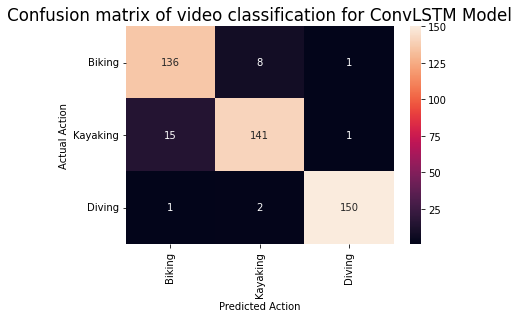

In [ ]:
plot_confusion_matrix(Label_s, Mat_ConvLSTM, ClassesLIST, 'ConvLSTM Model')

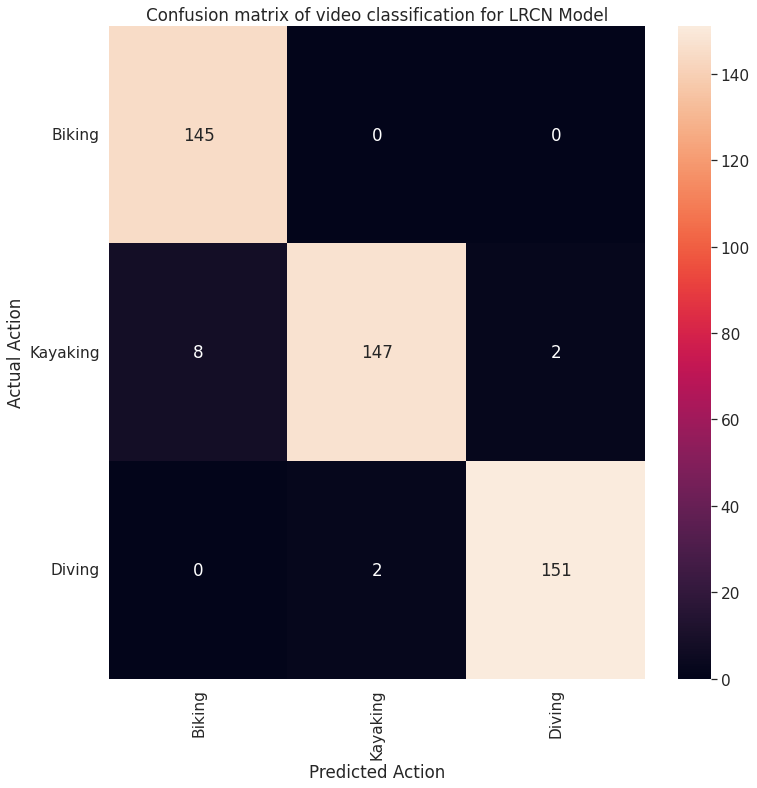

In [ ]:
plot_confusion_matrix(Label_s, Mat_LRCN, ClassesLIST, 'LRCN Model')

# Step 6.5: Visualize Overall Model Performance using Random Dataset

In [ ]:
# Specify the height and width to which each video frame will be resized in our dataset.
ImageHeight_RD , ImageWidth_RD = 64, 64

# Specify the number of frames of a video that will be fed to the model as one sequence.
SequenceLength_RD = 20

# Specify the directory containing the UCF50 dataset. 
DatasetDIR_RD = "/content/RandomTestDataset"

# Specify the list containing the names of the classes used for training. Feel free to choose any set of classes.
ClassesLIST_RD = ["Biking", "Kayaking", "Diving"]

In [ ]:
def CreateRandomDatasetFunction():

    # Declared Empty Lists to store the features, labels and video file path values.
    Feature_s_RD = []
    Label_s_RD = []
    VideoFilesPath_s_RD = []
    
    # Iterating through all the classes mentioned in the classes list
    for ClassIndex_RD, ClassName_RD in enumerate(ClassesLIST_RD):
        
        # Display the name of the class whose data is being extracted.
        print(f'Extracting_Data_of_Class :: {ClassName_RD}')
        
        # Get the list of video files present in the specific class name directory.
        FilesList_RD = os.listdir(os.path.join(DatasetDIR_RD, ClassName_RD))
        
        # Iterate through all the files present in the files list.
        for FileName_RD in FilesList_RD:
            
            # Get the complete video path.
            VideoFilePath_RD = os.path.join(DatasetDIR_RD, ClassName_RD, FileName_RD)

            # Extract the frames of the video file.
            Frame_s_RD = FramesExtractionFunction(VideoFilePath_RD)

            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(Frame_s_RD) == SequenceLength:

                # Append the data to their repective lists.
                Feature_s_RD.append(Frame_s_RD)
                Label_s_RD.append(ClassIndex_RD)
                VideoFilesPath_s_RD.append(VideoFilePath_RD)

    # Converting the list to numpy arrays
    Feature_s_RD = np.asarray(Feature_s_RD)
    Label_s_RD = np.array(Label_s_RD)  
    
    # Return the frames, class index, and video file path.
    return Feature_s_RD, Label_s_RD, VideoFilesPath_s_RD

In [ ]:
# Create the dataset.
Feature_s_RD, Label_s_RD, VideoFilesPath_s_RD = CreateRandomDatasetFunction()

Extracting_Data_of_Class :: Biking
Extracting_Data_of_Class :: Kayaking
Extracting_Data_of_Class :: Diving


In [ ]:
Count_RD = 0
PredictCounter_LRCN_RD = 0
PredictCounter_ConvLSTM_RD = 0
Mat_ConvLSTM_RD = []
Mat_LRCN_RD = []
for Label_RD in Label_s_RD:
  print(f'...................  {Count_RD}  ...................')
  ActualClassName_RD = ClassesLIST_RD[Label_RD]
  print(f'ActualClassName: {ActualClassName_RD}')
  print(f'Model: ConvLSTM')
  Predict_ConvLSTM_RD, PredictedLabel_ConvLSTM_RD = OverallPredictionFunction(VideoFilesPath_s_RD[Count_RD], 20, 'ConvLSTM')
  print(f'Model: LRCN')
  Predict_LRCN_RD, PredictedLabel_LRCN_RD = OverallPredictionFunction(VideoFilesPath_s_RD[Count_RD], 20, 'LRCN')
  Count_RD = Count_RD + 1
  if(ClassesLIST_RD[Label_RD] == Predict_ConvLSTM_RD):
    PredictCounter_ConvLSTM_RD = PredictCounter_ConvLSTM_RD + 1
  if(ClassesLIST_RD[Label_RD] == Predict_LRCN_RD):
    PredictCounter_LRCN_RD = PredictCounter_LRCN_RD + 1
  Mat_ConvLSTM_RD.insert(Count_RD,PredictedLabel_ConvLSTM_RD)
  Mat_LRCN_RD.insert(Count_RD,PredictedLabel_LRCN_RD)


...................  0  ...................
ActualClassName: Biking
Model: ConvLSTM
1/1 [==============================] - 0s 60ms/step
Action Predicted: Biking
Confidence: 0.9983015060424805
Model: LRCN
1/1 [==============================] - 0s 20ms/step
Action Predicted: Biking
Confidence: 0.9896563291549683
...................  1  ...................
ActualClassName: Biking
Model: ConvLSTM
1/1 [==============================] - 0s 60ms/step
Action Predicted: Biking
Confidence: 0.5453677773475647
Model: LRCN
1/1 [==============================] - 0s 17ms/step
Action Predicted: Kayaking
Confidence: 0.8611108064651489
...................  2  ...................
ActualClassName: Biking
Model: ConvLSTM
1/1 [==============================] - 0s 60ms/step
Action Predicted: Biking
Confidence: 0.9998995065689087
Model: LRCN
1/1 [==============================] - 0s 17ms/step
Action Predicted: Biking
Confidence: 0.9993846416473389
...................  3  ...................
ActualClassName: B

In [ ]:
print(f'ConvLSTM Model accurately predict {PredictCounter_ConvLSTM_RD} of videos out of {Count_RD} for random test dataset.')
print(f'ConvLSTM Model video prediction percentage {round((PredictCounter_ConvLSTM_RD/Count_RD), 2)*100} % for random test dataset.')

print(f'LRCN Model accurately predict {PredictCounter_LRCN_RD} of videos out of {Count_RD} for random test dataset.')
print(f'LRCN Model video prediction percentage {round((PredictCounter_LRCN_RD/Count_RD), 2)*100} % for random test dataset.')

ConvLSTM Model accurately predict 60 of videos out of 93 for random test dataset.
ConvLSTM Model video prediction percentage 65.0 % for random test dataset.
LRCN Model accurately predict 56 of videos out of 93 for random test dataset.
LRCN Model video prediction percentage 60.0 % for random test dataset.


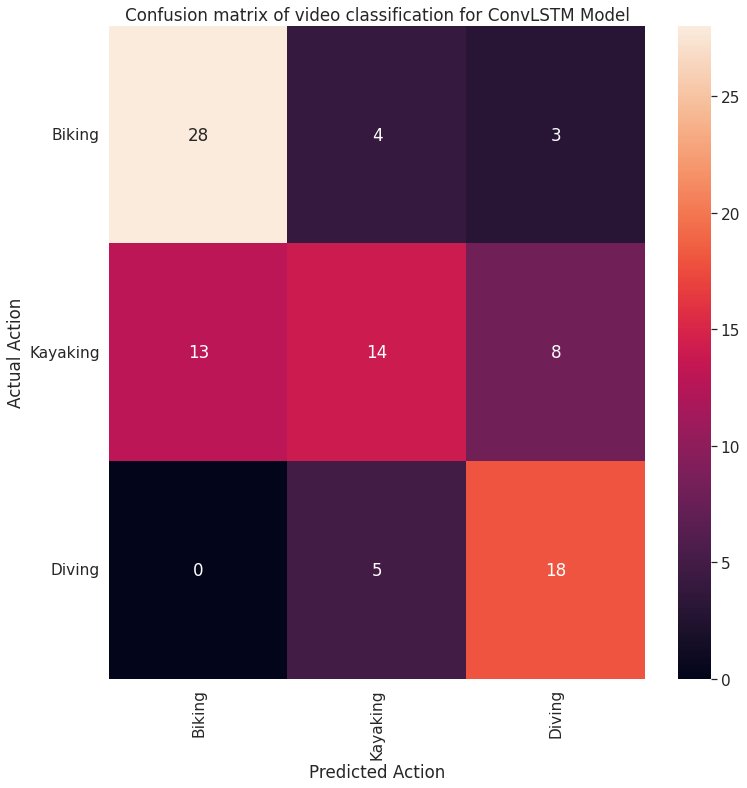

In [ ]:
plot_confusion_matrix(Label_s_RD, Mat_ConvLSTM_RD, ClassesLIST_RD, 'ConvLSTM Model')

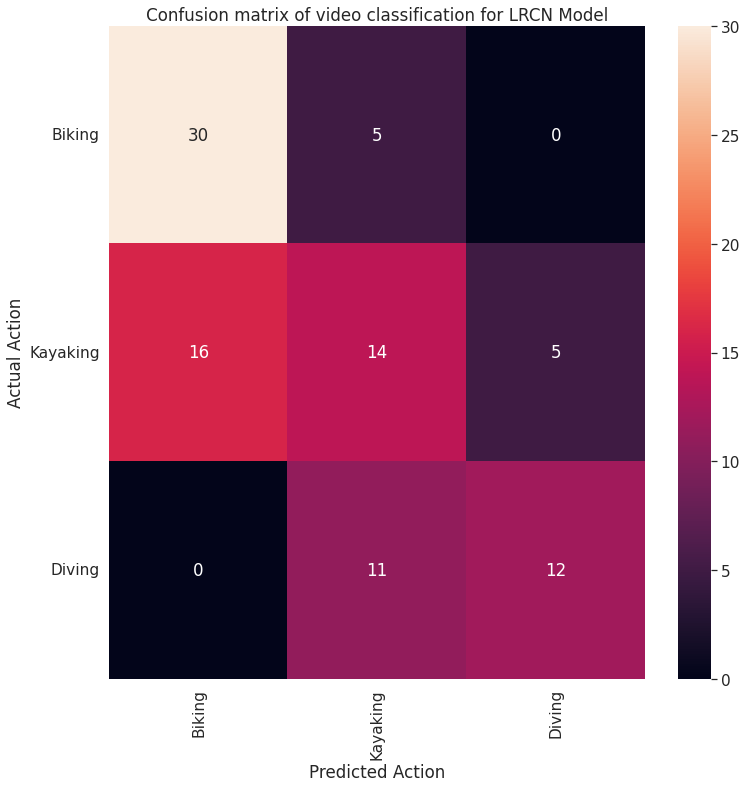

In [ ]:
plot_confusion_matrix(Label_s_RD, Mat_LRCN_RD, ClassesLIST_RD, 'LRCN Model')